##           **K means clustering**
####**Student name  UDITA CHATTERJEE**





 We have taken IRIS datasets for K means clustering.

In [15]:
from google.colab import files
uploaded=files.upload()

Saving Iris.csv to Iris (1).csv


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


In [17]:
data=pd.read_csv('Iris.csv')

We want to find how many class of flowers Iris datasets have.thus we run the following command,in the notebook

In [18]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Hence, It has 3 type of classes or varities.


1.   'Iris-setosa'
2.   'Iris-versicolor'
3.   'Iris-virginica'

Thus we remove the species column from the dataset.and run the k-means algorithm by taking k=3 to see how strong the algorithm is.
k= no of clusters to be taken







In [19]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Each variety has 50 responses.


In [20]:
data=data.drop(columns='Species')



```
# This is formatted as code
```

Now we will see the data description by using the following command.
we remove the ID column as it is un-necessary


In [21]:
descrip=data.drop(columns='Id')
descrip.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We start with 3 centroids.we will choose centroid points as mean point,30% percentile point and median

In [22]:
C1=[np.mean(descrip,axis=0)[0],np.mean(descrip,axis=0)[1],np.mean(descrip,axis=0)[2],np.mean(descrip,axis=0)[3]]
C2=[np.median(descrip,axis=0)[0],np.median(descrip,axis=0)[1],np.median(descrip,axis=0)[2],np.median(descrip,axis=0)[3]]
C3=[np.percentile(descrip,axis=0,q=30)[0],np.percentile(descrip,axis=0,q=0.30)[1],np.percentile(descrip,axis=0,q=0.30)[2],np.percentile(descrip,axis=0,q=30)[3]]

C=np.zeros((3,4,2))

C[0,:,0]=C1
C[1,:,0]=C2
C[2,:,0]=C3

C[i,:,0] signifies the ith centroid.


Here,there is 4 features or variables in the dataset.We do some data visualization to see whether the  pre-defined 3 classes/clusters  are visible  in the lower dimensions or not.

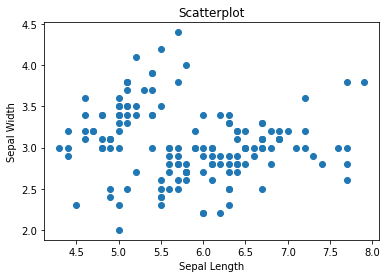

In [23]:
plt.title('Scatterplot')
plt.scatter(data.SepalLengthCm,data.SepalWidthCm)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

Text(0, 0.5, 'Petal Width')

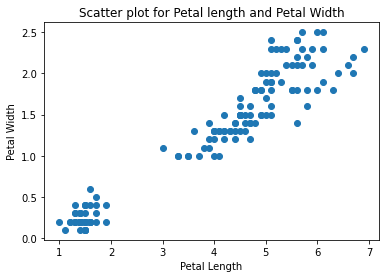

In [24]:
plt.title('Scatter plot for Petal length and Petal Width')
plt.scatter(data.PetalLengthCm,data.PetalWidthCm)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

Text(0, 0.5, 'Petal Width')

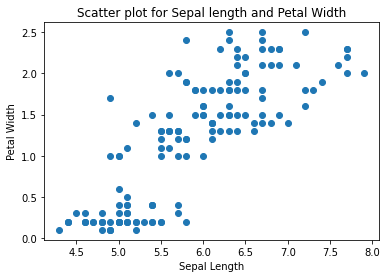

In [25]:
plt.title('Scatter plot for Sepal length and Petal Width')
plt.scatter(data.SepalLengthCm,data.PetalWidthCm)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')

Text(0, 0.5, 'Petal Length')

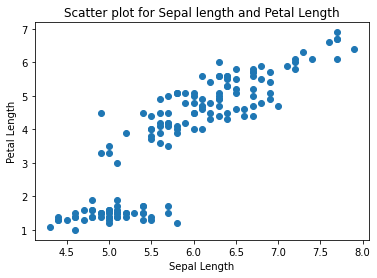

In [26]:
plt.title('Scatter plot for Sepal length and Petal Length')
plt.scatter(data.SepalLengthCm,data.PetalLengthCm)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

Text(0, 0.5, 'Petal Length')

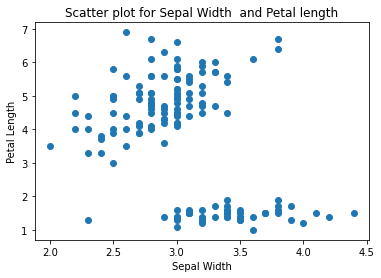

In [27]:
plt.title('Scatter plot for Sepal Width  and Petal length')
plt.scatter(data.SepalWidthCm,data.PetalLengthCm)
plt.xlabel('Sepal Width')
plt.ylabel('Petal Length')

Text(0, 0.5, 'Petal Width')

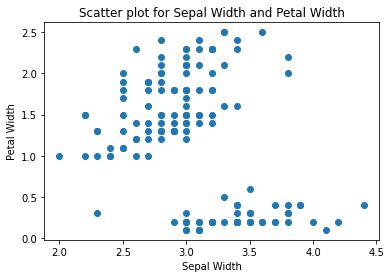

In [28]:
plt.title('Scatter plot for Sepal Width and Petal Width')
plt.scatter(data.SepalWidthCm,data.PetalWidthCm)
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')

In $R^{2}$  only two clusters are visible.

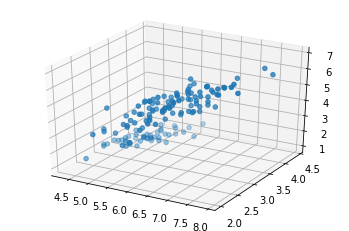

In [29]:
ax=plt.axes(projection='3d')
ax.scatter3D(data.SepalLengthCm,data.SepalWidthCm,data.PetalLengthCm,cmap='Greens')

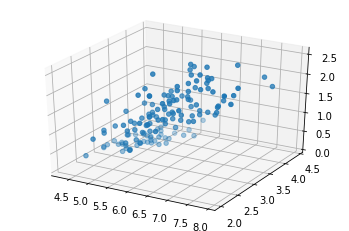

In [30]:
ax=plt.axes(projection='3d')
ax.scatter3D(data.SepalLengthCm,data.SepalWidthCm,data.PetalWidthCm,cmap='Greens')

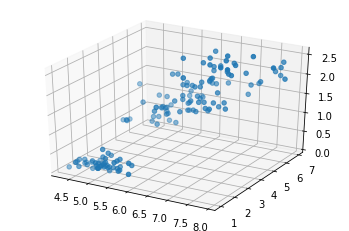

In [31]:
ax=plt.axes(projection='3d')
ax.scatter3D(data.SepalLengthCm,data.PetalLengthCm,data.PetalWidthCm,cmap='Greens')

Text(0.5, 0, 'Petal Width')

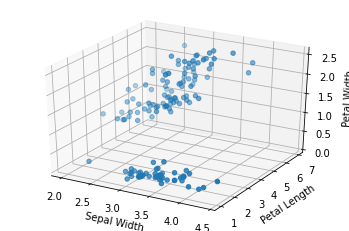

In [32]:
ax=plt.axes(projection='3d')
ax.scatter3D(data.SepalWidthCm,data.PetalLengthCm,data.PetalWidthCm,cmap='Greens')
ax.set_xlabel('Sepal Width')
ax.set_ylabel('Petal Length')
ax.set_zlabel('Petal Width')

In [33]:
len(data)
data=pd.DataFrame(data)

In $R^{3}$  also 2 clusters are visible

Now we define distance function.here we have taken Euclidean Distance

In [34]:
def distance(X,Y):
  m=np.shape(X)[0]
  c=0
  for i in range(m):
    c=c+(X[i]-Y[i])**2
  dist=np.sqrt(c)
  return dist



Now we take 3 blank lists.

1.By using distance function we put the point in the ith list if the point is  near the ith centroid.
2. after each iteration we take the ith centroid as the mean of the ith list elements.

3.we stop when the distance between  ith centroids($\forall$ $i \in$ {1,2,3}) in consecutive iterations are very small ~ 1e-10

3 lists  are considered as 3 clusters. 

In [35]:
list1=[]
list2=[]
list3=[]



dist=np.zeros((150,3))
#for i in range():
  # dist[i]
for i in range(150):

  for j in range(3):

    dist[i,j]=distance(descrip.iloc[i],C[j,:,0])

  if dist[i,0]<=dist[i,1] and dist[i,0]<=dist[i,2]:

    list1.append(descrip.iloc[i])
  elif dist[i,1]<=dist[i,0] and dist[i,1]<=dist[i,2]:


    list2.append(descrip.iloc[i])
  else:

    list3.append(descrip.iloc[i])
C[0,:,1]=np.mean(list1)
C[1,:,1]=np.mean(list2)
C[2,:,1]=np.mean(list3)

list1=[]
list2=[]
list3=[]

In [36]:
if distance(C[0,:,0],C[0,:,1]) >1e-10 or distance(C[1,:,0],C[1,:,1]) >1e-10 or distance(C[2,:,0],C[2,:,1]) >1e-10:
  for i in range(150):
    for j in range(3):
      dist[i,j]=distance(descrip.iloc[i],C[j,:,1])
    if dist[i,0]<=dist[i,1] and dist[i,0]<=dist[i,2]:
      list1.append(descrip.iloc[i])
    elif dist[i,1]<=dist[i,0] and dist[i,1]<=dist[i,2]:
      list2.append(descrip.iloc[i])
    else:
      list3.append(descrip.iloc[i])
      
  
  C[0,:,0]=C[0,:,1]
  C[1,:,0]=C[1,:,1]
  C[2,:,0]=C[2,:,1]
  C[0,:,1]=np.mean(list1)
  C[1,:,1]=np.mean(list2)
  C[2,:,1]=np.mean(list3)

  
  list1_new=list1
  list2_new=list2
  list3_new=list3
  list1=[]
  list2=[]
  list3=[]

In [37]:
print(np.shape(list1_new))
print(np.shape(list2_new))
print(np.shape(list3_new))

(30, 4)
(72, 4)
(48, 4)


Comment:
As each species contain 50 responses and here we have got 30,72,48 responses from clusters 1,2 & 3 respectively,hence,
some points are mis-classified in the K-means clustering.

In [38]:
print("Elements of first clusters")
print(list1_new)
print('\n')
print('elements of 2nd clusters')
print(list2_new)
print('\n')
print('elements of 3rd clusters')
print(list3_new)


Elements of first clusters
[SepalLengthCm    5.7
SepalWidthCm     4.4
PetalLengthCm    1.5
PetalWidthCm     0.4
Name: 15, dtype: float64, SepalLengthCm    5.7
SepalWidthCm     3.8
PetalLengthCm    1.7
PetalWidthCm     0.3
Name: 18, dtype: float64, SepalLengthCm    5.5
SepalWidthCm     2.3
PetalLengthCm    4.0
PetalWidthCm     1.3
Name: 53, dtype: float64, SepalLengthCm    5.7
SepalWidthCm     2.8
PetalLengthCm    4.5
PetalWidthCm     1.3
Name: 55, dtype: float64, SepalLengthCm    4.9
SepalWidthCm     2.4
PetalLengthCm    3.3
PetalWidthCm     1.0
Name: 57, dtype: float64, SepalLengthCm    5.2
SepalWidthCm     2.7
PetalLengthCm    3.9
PetalWidthCm     1.4
Name: 59, dtype: float64, SepalLengthCm    5.0
SepalWidthCm     2.0
PetalLengthCm    3.5
PetalWidthCm     1.0
Name: 60, dtype: float64, SepalLengthCm    6.0
SepalWidthCm     2.2
PetalLengthCm    4.0
PetalWidthCm     1.0
Name: 62, dtype: float64, SepalLengthCm    5.6
SepalWidthCm     2.9
PetalLengthCm    3.6
PetalWidthCm     1.3
Name: 64